In [1]:
import numpy as np
import seaborn as sns
import umap

In [2]:
#drive.mount('/content/drive')

In [3]:
lit_vectors_np = np.load('vectorized_lit.npy')
conv_vectors_np = np.load('vectorized_tg.npy')

In [6]:
sample_size = 2000
num_rows = lit_vectors_np.shape[0]
indices = np.random.choice(num_rows, size=sample_size, replace=False)
lit_vectors_sample = lit_vectors_np[indices]
conv_vectors_sample = conv_vectors_np[indices]

In [7]:
all_vectors_sample_np = np.concatenate((lit_vectors_sample, conv_vectors_sample), axis=0)

In [8]:
reducer_2d = umap.UMAP(n_components=2,
                       n_neighbors=15,  
                       min_dist=0.1,
                       verbose=True)

In [9]:
embedding_2d_all_sample = reducer_2d.fit_transform(all_vectors_sample_np)

C:\Users\petro\Desktop\TST\tst\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


UMAP( verbose=True)
Tue May 13 14:33:40 2025 Construct fuzzy simplicial set
Tue May 13 14:33:48 2025 Finding Nearest Neighbors
Tue May 13 14:33:52 2025 Finished Nearest Neighbor Search
Tue May 13 14:33:55 2025 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Tue May 13 14:33:57 2025 Finished embedding


In [10]:
umap_2d_lit_sample = embedding_2d_all_sample[:len(lit_vectors_sample)]
umap_2d_conv_sample = embedding_2d_all_sample[len(lit_vectors_sample):]

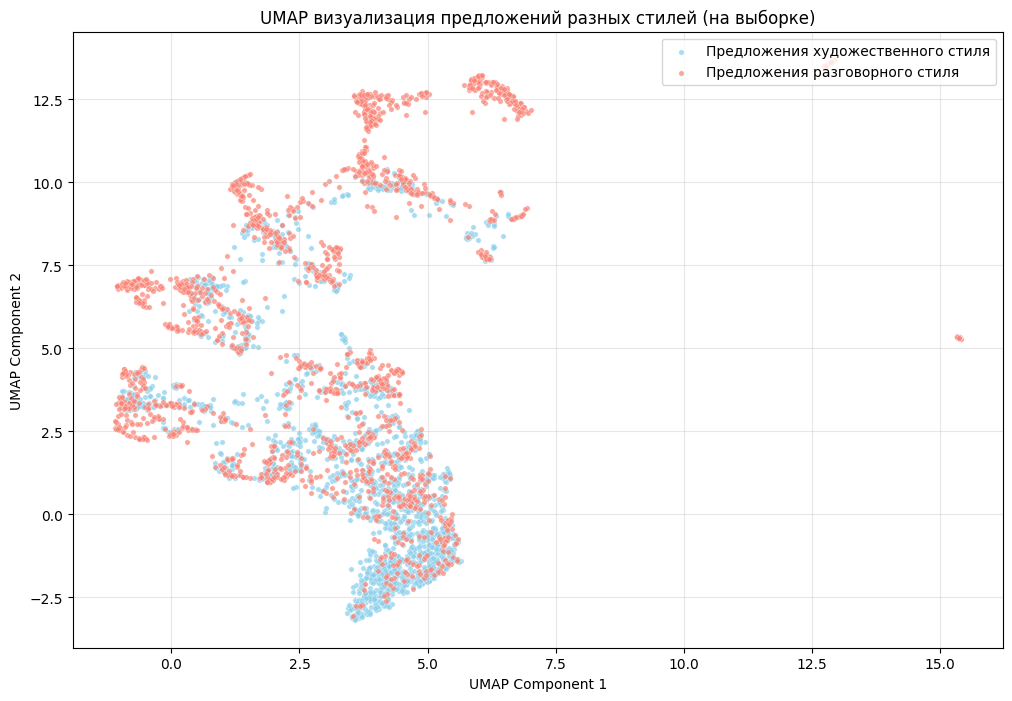

In [12]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=umap_2d_lit_sample[:, 0], y=umap_2d_lit_sample[:, 1], color='skyblue', label='Предложения художественного стиля', alpha=0.7, s=15)
sns.scatterplot(x=umap_2d_conv_sample[:, 0], y=umap_2d_conv_sample[:, 1], color='salmon', label='Предложения разговорного стиля', alpha=0.7, s=15)

plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('UMAP визуализация предложений разных стилей (на выборке)')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.savefig('umap_2d.png', dpi=300, bbox_inches='tight')
plt.show()

In [13]:
reducer_1d = umap.UMAP(n_components=1,
                       n_neighbors=15,
                       min_dist=0.1,
                       verbose=True)

In [14]:
embedding_1d_all_sample = reducer_1d.fit_transform(all_vectors_sample_np)

C:\Users\petro\Desktop\TST\tst\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


UMAP(n_components=1, verbose=True)
Tue May 13 14:36:00 2025 Construct fuzzy simplicial set
Tue May 13 14:36:09 2025 Finding Nearest Neighbors
Tue May 13 14:36:09 2025 Finished Nearest Neighbor Search
Tue May 13 14:36:09 2025 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Tue May 13 14:36:10 2025 Finished embedding


In [15]:
umap_1d_lit_sample = embedding_1d_all_sample[:len(lit_vectors_sample)]
umap_1d_conv_sample = embedding_1d_all_sample[len(lit_vectors_sample):]

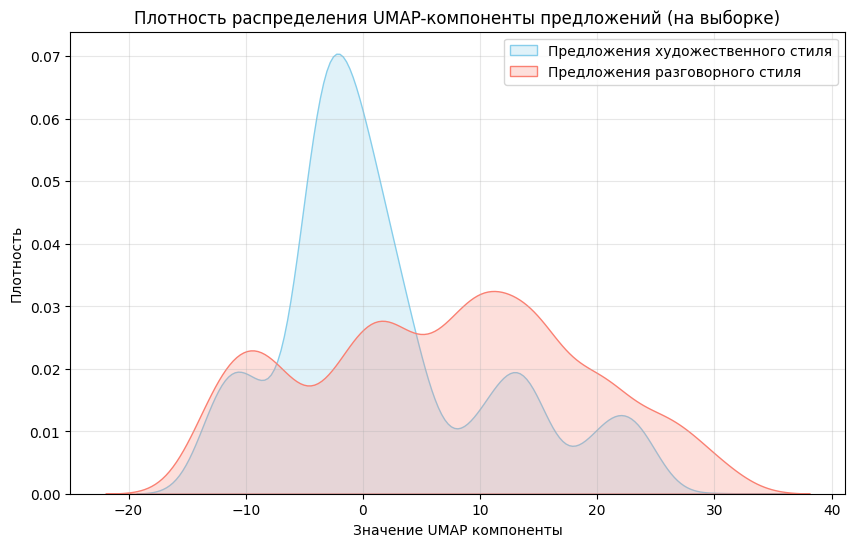

In [17]:
plt.figure(figsize=(10, 6))
sns.kdeplot(umap_1d_lit_sample.flatten(), color='skyblue', label='Предложения художественного стиля', fill=True)
sns.kdeplot(umap_1d_conv_sample.flatten(), color='salmon', label='Предложения разговорного стиля', fill=True)
plt.xlabel('Значение UMAP компоненты')
plt.ylabel('Плотность')
plt.title('Плотность распределения UMAP-компоненты предложений (на выборке)')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.savefig('umap_1d.png', dpi=300, bbox_inches='tight')
plt.show()